In [39]:
import numpy as np
from PIL import Image
import cv2
import os

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

import matplotlib.pyplot as plt
#from pyquaternion import Quaternion

from data_helper import UnlabeledDataset, LabeledDataset

In [40]:
import kornia

In [41]:
camera = {'intrinsics': 
{'CAM_FRONT_LEFT': np.array([[879.03824732/4   ,0.         ,613.17597314/4],
 [  0.         ,879.03824732/4 ,524.14407205/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_FRONT' : np.array([[882.61644117/4   ,0.         ,621.63358525/4],
 [  0.         ,882.61644117/4 ,524.38397862/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_FRONT_RIGHT' : np.array([[880.41134027/4   ,0.         ,618.9494972/4],    
 [  0.         ,880.41134027/4 ,521.38918482/4],
 [  0.           ,0.           ,1.        ]]),       
'CAM_BACK_LEFT' : np.array([[881.28264688/4   ,0.         ,612.29732111/4],
 [  0.         ,881.28264688/4 ,521.77447199/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_BACK' : np.array([[882.93018422/4   ,0.         ,616.45479905/4],
 [  0.         ,882.93018422/4 ,528.27123027/4],
 [  0.           ,0.           ,1.        ]]),
'CAM_BACK_RIGHT' : np.array([[881.63835671/4   ,0.         ,607.66308183/4],
 [  0.         ,881.63835671/4 ,525.6185326/4],          
 [  0.           ,0.           ,1.        ]])
},
'quaternions' :
{'CAM_FRONT_LEFT': np.array([ 0.68316462 ,-0.68338771  ,0.17581486 ,-0.18799863]),
 'CAM_FRONT' : np.array([ 0.50745829 ,-0.49812866  ,0.49496606 ,-0.49934369]),
 'CAM_FRONT_RIGHT' : np.array([-0.19470424  ,0.17808752 ,-0.68312934  ,0.68095909]),
 'CAM_BACK_LEFT' : np.array([-0.67797289  ,0.6871698   ,0.19201452 ,-0.1768143 ]),
 'CAM_BACK' : np.array([-0.49033062  ,0.50741961  ,0.50819262 ,-0.49379061]),
 'CAM_BACK_RIGHT' : np.array([-0.17126042  ,0.1897148   ,0.68851343 ,-0.6786766 ])
},
'translations' :
{'CAM_FRONT_LEFT': np.array([1.28400265 ,0.31639086 ,1.67877024]),
 'CAM_FRONT' : np.array([1.50612211 ,-0.03602647  ,1.69421848]),
 'CAM_FRONT_RIGHT' : np.array([1.27320628 ,-0.31664681  ,1.68114556]),
 'CAM_BACK_LEFT' : np.array([1.04338732 ,0.31565584 ,1.66400371]),
 'CAM_BACK' : np.array([ 0.81558292 ,-0.00559198  ,1.65395645]),
 'CAM_BACK_RIGHT' : np.array([ 1.04116266 ,-0.31121292  ,1.66718288])
}
         }

In [42]:
camera

{'intrinsics': {'CAM_FRONT_LEFT': array([[219.75956183,   0.        , 153.29399328],
         [  0.        , 219.75956183, 131.03601801],
         [  0.        ,   0.        ,   1.        ]]),
  'CAM_FRONT': array([[220.65411029,   0.        , 155.40839631],
         [  0.        , 220.65411029, 131.09599465],
         [  0.        ,   0.        ,   1.        ]]),
  'CAM_FRONT_RIGHT': array([[220.10283507,   0.        , 154.7373743 ],
         [  0.        , 220.10283507, 130.3472962 ],
         [  0.        ,   0.        ,   1.        ]]),
  'CAM_BACK_LEFT': array([[220.32066172,   0.        , 153.07433028],
         [  0.        , 220.32066172, 130.443618  ],
         [  0.        ,   0.        ,   1.        ]]),
  'CAM_BACK': array([[220.73254606,   0.        , 154.11369976],
         [  0.        , 220.73254606, 132.06780757],
         [  0.        ,   0.        ,   1.        ]]),
  'CAM_BACK_RIGHT': array([[220.40958918,   0.        , 151.91577046],
         [  0.        , 220.409

In [44]:
#np.degrees(np.array(Quaternion(camera['quaternions']['CAM_FRONT']).yaw_pitch_roll))

In [38]:
np.degrees(np.array(Quaternion(camera['quaternions']['CAM_BACK']).yaw_pitch_roll))

array([-97.57878586, -88.17938321, 172.2672411 ])

In [47]:
example_folder = 'data/scene_121/sample_0'
#example_folder = '/Users/nhuang37/Desktop/NYU DS/Yr 2 Sem2/DL/Final project/DLSP20-Project/data/scene_121/sample_0'

## Front View

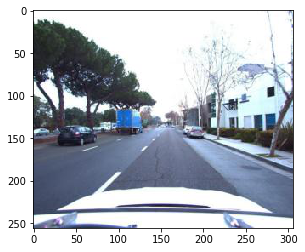

In [48]:
# Front View
image = cv2.imread(os.path.join(example_folder, 'CAM_FRONT.jpeg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [49]:
image.shape

(256, 306, 3)

In [50]:
src = np.float32([[75,200], [75,170], [231,200], [231,170]])
#dst306 = np.float32(list(zip([143.5058,136.3664,163.2762,169.9879], [207.3915,187.7969,207.3915,187.7969])))
#dst612 = np.float32(list(zip([286.4787,272.1767,326.0845,339.5298], [414.4597,375.2063,414.4597,375.2063])))
dst = np.float32(list(zip([142.9038,134.7327,163.4615,171.1431], [189.7793,167.3565,189.7793,167.3565])))

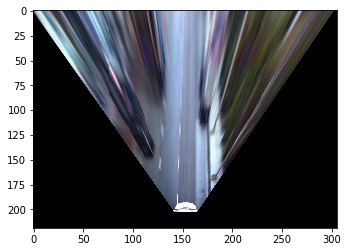

In [51]:
# Keep Width
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(image, M, (306,219))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

In [52]:
M

array([[-6.92636526e-02, -1.17089785e+00,  1.64264194e+02],
       [-1.12965193e-14, -1.66944201e+00,  2.34140507e+02],
       [-5.76795556e-17, -7.62799727e-03,  1.00000000e+00]])

In [57]:
img = kornia.image_to_tensor(image)#.permute((2,0,1)) 
img = torch.unsqueeze(img.float(), dim=0) # BxCxHxW
img.shape

torch.Size([1, 3, 256, 306])

In [61]:
img_warp = kornia.warp_perspective(img, torch.tensor(M).float(), dsize=(219, 306))

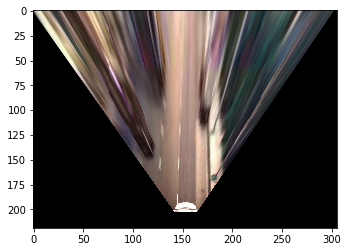

In [62]:
image_warp = kornia.tensor_to_image(img_warp.byte()[0])
plt.imshow(image_warp)

## Front Left View

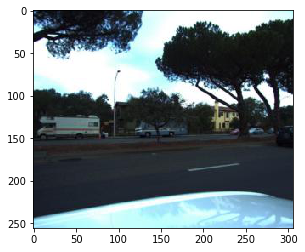

In [11]:
# Front Left View
image = cv2.imread(os.path.join(example_folder, 'CAM_FRONT_LEFT.jpeg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [12]:
src = np.float32([[75,200], [75,170], [231,200], [231,170]])
# dst306 = np.float32(list(zip([141.9507,135.0738,161.5291,168.3544], [207.7741,188.4685,207.7741,188.4685])))
# dst612 = np.float32(list(zip([283.3636,269.5872,322.5845,336.2575], [415.2261,376.5516,415.2261,376.5516])))
dst = np.float32(list(zip([143.1914,135.2543,163.7312,171.6087], [189.9223,167.6442,189.9223,167.6442])))

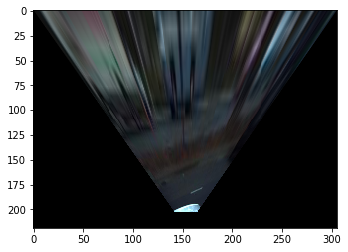

In [13]:
# Keep Width
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(image, M, (306,219))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

In [14]:
M

array([[-6.92946073e-02, -1.17143003e+00,  1.64122408e+02],
       [-1.33781874e-14, -1.67019853e+00,  2.34084846e+02],
       [-7.00394603e-17, -7.63146706e-03,  1.00000000e+00]])

## Front Right View

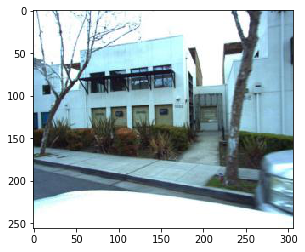

In [15]:
# Front Right View
image = cv2.imread(os.path.join(example_folder, 'CAM_FRONT_RIGHT.jpeg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [16]:
src = np.float32([[75,200], [75,170], [231,200], [231,170]])
# dst306 = np.float32(list(zip([145.2979,138.4613,164.7187,171.2574], [207.9535,189.0792,207.9535,189.0792])))
# dst612 = np.float32(list(zip([290.0689 ,276.3733,328.9742,342.0730], [415.5855, 377.7750, 415.5855,377.7750])))
dst = np.float32(list(zip([143.0181,135.0878,163.5252,171.1099], [189.9234,168.0330,189.9234,168.0330])))

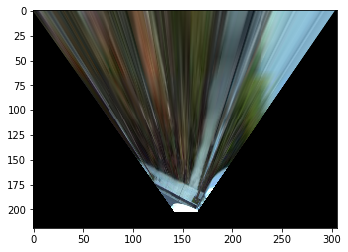

In [17]:
# Keep Width
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(image, M, (306,219))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

In [18]:
M

array([[-7.02452787e-02, -1.17762492e+00,  1.64369634e+02],
       [-2.27595720e-14, -1.67903365e+00,  2.34318471e+02],
       [-1.16009632e-16, -7.67182090e-03,  1.00000000e+00]])

## Back View

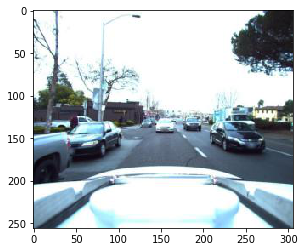

In [19]:
# Back View
image = cv2.imread(os.path.join(example_folder, 'CAM_BACK.jpeg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [20]:
src = np.float32([[75,200], [75,170], [231,200], [231,170]])
# dst306 = np.float32(list(zip([144.0169,137.6672,162.7762,168.9471], [208.9258,191.2009,208.9258,191.2009])))
# dst612 = np.float32(list(zip([287.5027,274.7825,325.0828,337.4448], [417.5334,382.0255 ,417.5334,382.0255])))
dst = np.float32(list(zip([143.0091,134.7120,163.6955,171.7590], [189.5869,166.4375,189.5869,166.4375])))

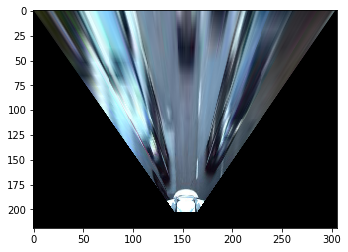

In [23]:
# Keep Width
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(image, M, (306,219))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

In [24]:
M

array([[-6.82085369e-02, -1.16228084e+00,  1.64011808e+02],
       [-1.23234756e-14, -1.65715610e+00,  2.33912863e+02],
       [-6.39679282e-17, -7.57186452e-03,  1.00000000e+00]])

## Back Left View

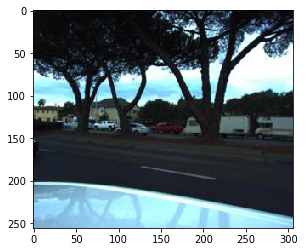

In [25]:
# Back Left View
image = cv2.imread(os.path.join(example_folder, 'CAM_BACK_LEFT.jpeg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [26]:
src = np.float32([[75,200], [75,170], [231,200], [231,170]])
# dst306 = np.float32(list(zip([142.5339,136.5759,161.0101,166.9568], [209.3773,192.5555,209.3773,192.5555])))
# dst612 = np.float32(list(zip([284.5319,272.5963,321.5447,333.4577], [418.4378,384.7391,418.4378,384.7391])))
dst = np.float32(list(zip([143.3273,135.6122,163.6534,171.3538], [190.1504,168.3788,190.1504,168.3788])))

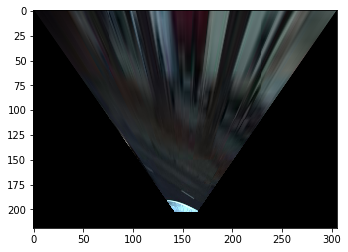

In [27]:
# Keep Width
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(image, M, (306,219))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

In [28]:
M

array([[-6.94775392e-02, -1.17675499e+00,  1.64135286e+02],
       [-1.19904087e-14, -1.67779415e+00,  2.34164782e+02],
       [-5.78963960e-17, -7.66615368e-03,  1.00000000e+00]])

## Back Right View

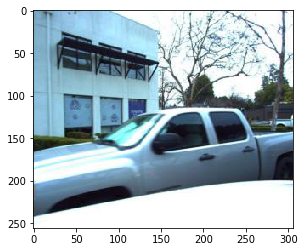

In [29]:
# Back Right View
image = cv2.imread(os.path.join(example_folder, 'CAM_BACK_RIGHT.jpeg'))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [30]:
src = np.float32([[75,200], [75,170], [231,200], [231,170]])
# dst306 = np.float32(list(zip([145.9523,139.8717,164.6983,170.9503], [208.9858,191.5526,208.9858,191.5526])))
# dst612 = np.float32(list(zip([291.3798,279.1988,328.9333,341.4578], [417.6535, 382.7299,417.6535,382.7299])))
dst = np.float32(list(zip([143.3184,135.4043,163.9686,172.1059], [189.6808,167.0022,189.6808,167.0022])))

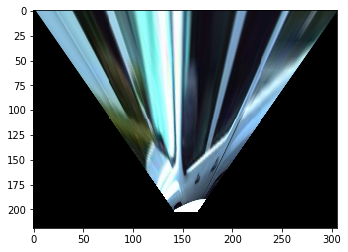

In [31]:
# Keep Width
M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
warped_img = cv2.warpPerspective(image, M, (306,219))
plt.imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))

In [32]:
M

array([[-6.91003275e-02, -1.16814423e+00,  1.63997347e+02],
       [-1.59872116e-14, -1.66551463e+00,  2.34087152e+02],
       [-8.30498864e-17, -7.61006318e-03,  1.00000000e+00]])